All Libraries:

In [2]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

diabetes dataset:

In [4]:
#Loading the diabetes dataset from a CSV file
diabets_dataset = pd.read_csv(r'C:\Users\DELL\Desktop\Diabets Predection\diabetes.csv')

In [5]:
# Displaying the first 5 rows of the dataset to understand its structure
diabets_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabets_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# Getting the number of rows and columns in the dataset
diabets_dataset.shape

(768, 9)

In [9]:
# Getting the summary statistics of the dataset
diabets_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


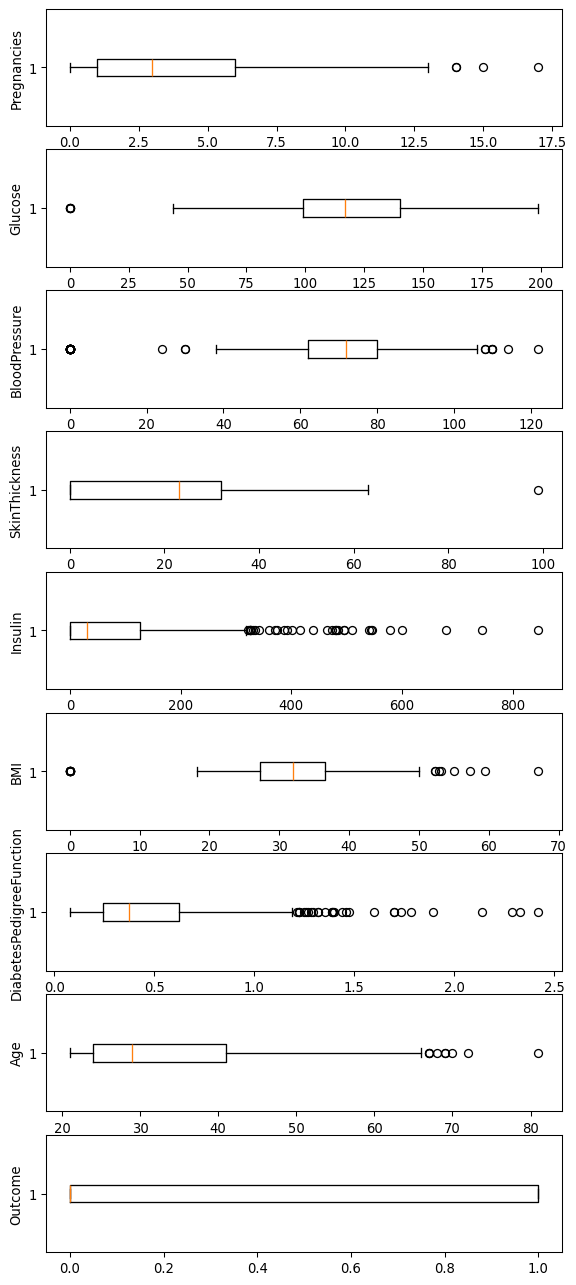

In [15]:
# Check the outliers

# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in diabets_dataset.columns:
    axs[i].boxplot(diabets_dataset[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [23]:
# Identify the quartiles
q1, q3 = np.percentile(diabets_dataset['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = diabets_dataset[(diabets_dataset['Insulin'] >= lower_bound) 
                & (diabets_dataset['Insulin'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound) 
                        & (clean_data['Pregnancies'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound) 
                        & (clean_data['Age'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound) 
                        & (clean_data['Glucose'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound) 
                        & (clean_data['BloodPressure'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound) 
                        & (clean_data['BMI'] <= upper_bound)]


# Identify the quartiles
q1, q3 = np.percentile(clean_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Drop the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound) 
                        & (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]

In [25]:
# Getting the count of unique values in the 'Outcome' column
diabets_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [27]:
# Calculating the mean of each feature grouped by the 'Outcome' column
diabets_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [29]:
# Separating the features (X) and the target variable (Y)
X = diabets_dataset.drop(columns = 'Outcome' , axis =1)  # Features (independent variables)
Y = diabets_dataset['Outcome']  # Target variable (dependent variable)

In [31]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [33]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


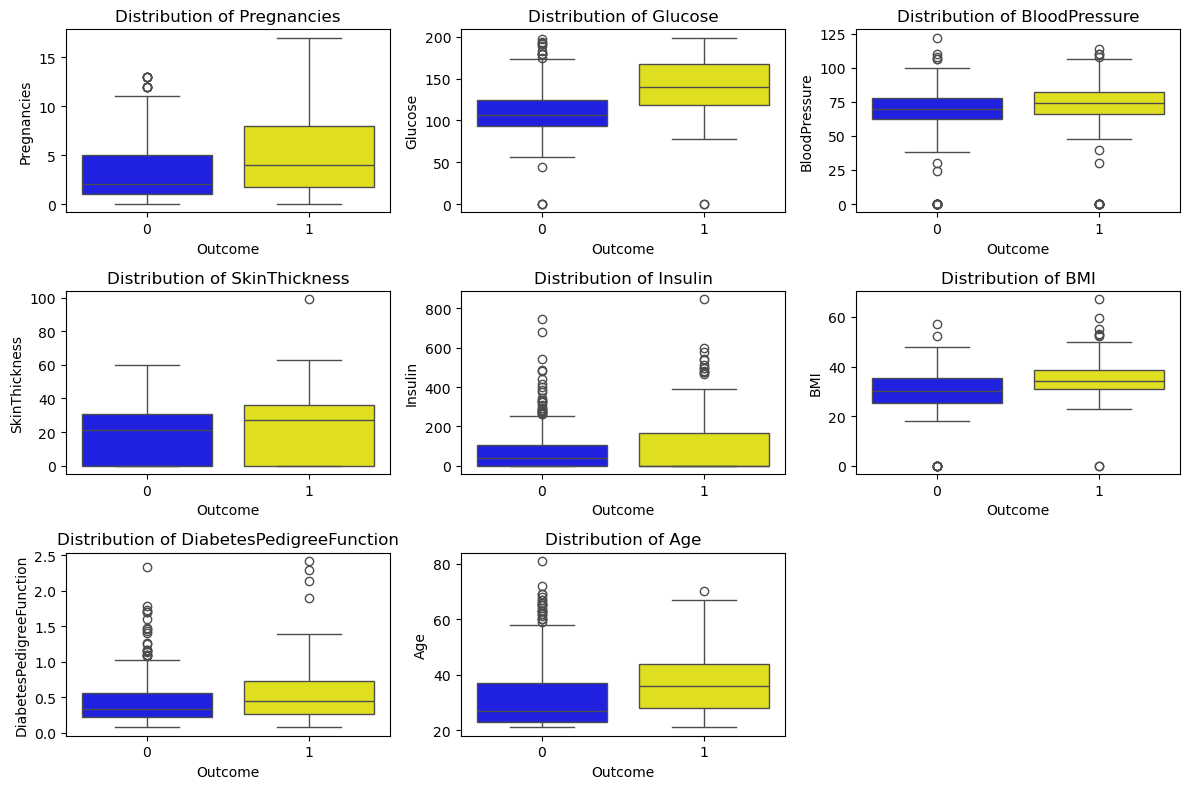

In [35]:
# Getting feature names
features = X.columns.tolist()

# Creating subplots (arrange in a 3x3 grid)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axs = axs.flatten()

# Define custom colors: 0 (Non-Diabetic) = Blue, 1 (Diabetic) = Yellow
custom_palette = {0: "blue", 1: "yellow"}

# Plot boxplots for each feature
for index, feature in enumerate(features):
    sns.boxplot(data=diabets_dataset, x='Outcome', y=feature, ax=axs[index], hue="Outcome", palette=custom_palette, legend=False)
    axs[index].set_title(f'Distribution of {feature}')

# Hide any extra subplot if the number of features is less than 9
if len(features) < 9:
    for i in range(len(features), 9):
        axs[i].set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()


In [37]:
corr_matrix = diabets_dataset.corr()

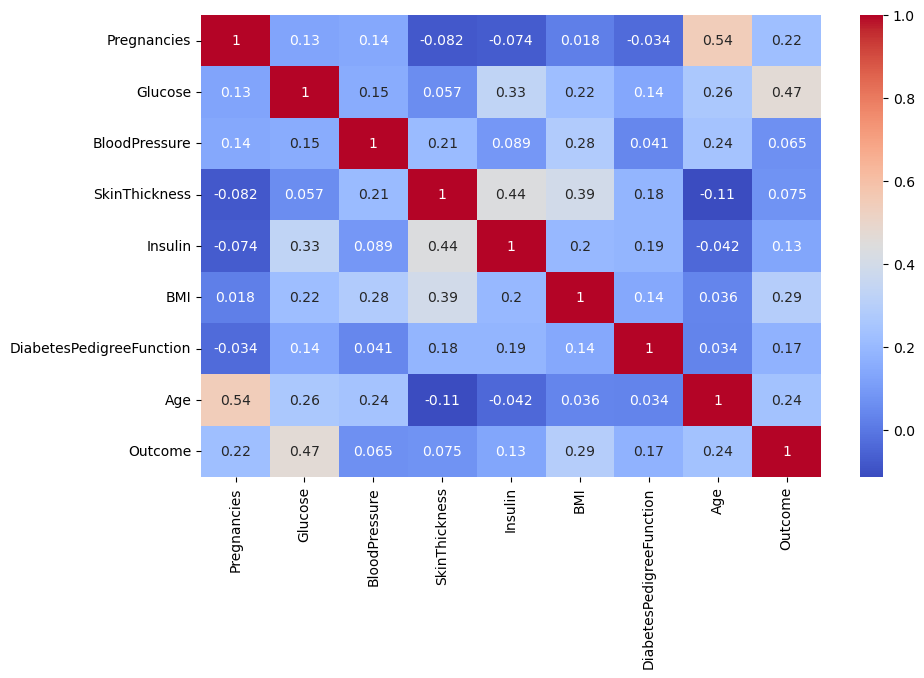

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', ax=ax)
plt.show()

In [43]:
corr_matrix['Outcome'].sort_values(ascending = False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [30]:
print(diabets_dataset.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


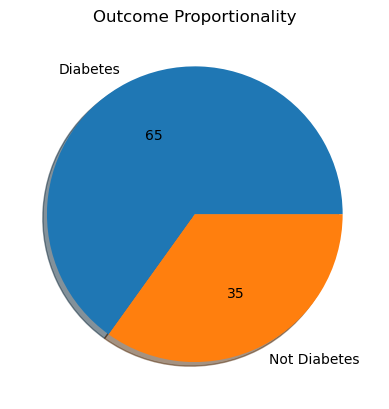

In [45]:
# Check Outcomes Proportionality
plt.pie(diabets_dataset.Outcome.value_counts(), 
        labels= ['Diabetes', 'Not Diabetes'], 
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

In [32]:
print(diabets_dataset.duplicated().sum())

0


In [34]:
# Initializing the StandardScaler to scale the features
scaler = StandardScaler()

In [36]:
# Scaling the features in X using the StandardScaler
X_train_scaled = scaler.fit_transform(X)

In [38]:
print(X_train_scaled)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [40]:
# Assigning the scaled features to X and the target variable to Y
X = X_train_scaled  # Scaled features
Y = diabets_dataset['Outcome']  # Target variable (Outcome)

In [42]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [44]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [46]:
# Initializing the Support Vector Classifier (SVC) with a linear kernel
classifier = svm.SVC(kernel = 'linear')

In [48]:
# Training the classifier using the training data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [50]:
# Making predictions on the training data and calculating accuracy
X_train_prediction = classifier.predict(X_train)  # Predictions on the training set
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)  # Accuracy on the training set

In [52]:
# Printing the accuracy score of the training data
print('accuracy score of the training data : ', training_data_accuracy)

accuracy score of the training data :  0.7866449511400652


In [54]:
# Making predictions on the testing data and calculating accuracy
X_test_prediction = classifier.predict(X_test)  # Predictions on the test set
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)  # Accuracy on the test set


In [56]:
# Printing the accuracy score of the testing data
print('Accuracy score of the testing data: ', testing_data_accuracy)

Accuracy score of the testing data:  0.7727272727272727


In [58]:
# Defining feature names and input data
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)  # Sample input data

# Converting the input data into a numpy array and then into a pandas DataFrame
input_data_as_numpy_array = np.asarray(input_data)
input_data_df = pd.DataFrame([input_data_as_numpy_array], columns=feature_names)

# Scaling the input data using the previously fitted scaler
std_data = scaler.transform(input_data_df)

# Making a prediction using the trained classifier
prediction = classifier.predict(std_data)

# Printing the result of the prediction
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


The person is not diabetic
